<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/ase3001_exercises_rocket_trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rocket trajectories

<style>
.MathJax {
  font-family: "HTML-CSS";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


This example involves the kinematics of a projectile, whose dynamical relations can be described by the following differential equations

<br>

$$
\begin{aligned}
  m\dot{V} &=  -0.5\rho V^2 S C_d - mg\sin\gamma \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{aligned}
$$

<br>

where $V$, and $\gamma$ represents the speed and the flight path angle of the projectile, where a positive $\gamma$ implies the projectile is going up, and $\gamma=+\pi/2$ implies vertical ascend.

<center>
<img src="https://jonghank.github.io/ee370/files/projectile.png" width="600">
</center>
Throughout this problem, you can assume that the gravitational acceleration is constant, $g=9.8m/s^2$, and the air density is well approximated by the following formula.

<br>

$$
  \rho(h) = 1.225 \left(1-2.256\times 10^{-5}h \right)^{5.256}
$$

<br>

Suppose a projectile with the following specifications is launched.

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $C_d$: drag coefficient (=$0.2$)
- $V(0)$: initial velocity (=$1000m/s$)





<br>

---

<br>

**(Problem 1)** For various initial launch angles, $\gamma(0) = 20,25,\dots, 65, 70$ degrees, plot the vertical trajectory (on $R-h$ plane) and the time history of the projectile's speed.

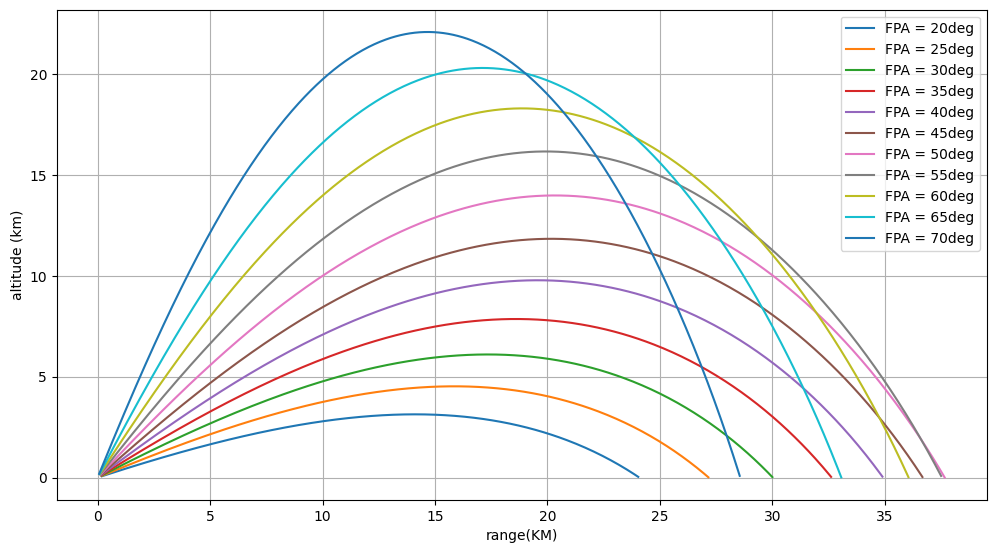

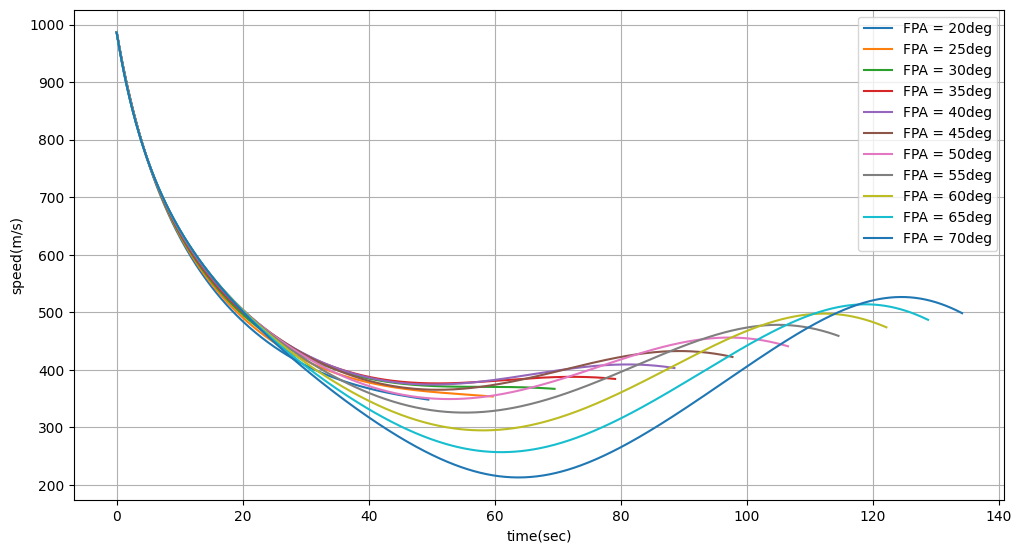

In [103]:
# your code here
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as spi
# your code here
Cd = 0.2
m = 40


def model(z,t,d):
  S = np.pi * d * d / 4
  v,gamma,R ,h= z
  rho = 1.225*(1-2.256e-5*h)**5.256
  v_dot = (-0.5 * rho* v*v * S * Cd - m*9.81*np.sin(gamma))/m
  gamma_dot = -9.8 * np.cos(gamma) / v
  R_dot = v*np.cos(gamma)
  h_dot = v*np.sin(gamma)
  return np.array([v_dot, gamma_dot,R_dot,h_dot])
gammas =[i for i in range(20,75,5)]
t = np.linspace(0,140, 700)
answers = []
d = 0.16
plt.figure(figsize=  (12,14))
plt.subplot(212)

for gamma in gammas:
  z = [1000,np.deg2rad(gamma), 0,0]
  state = spi.odeint(model,z,t,args = (d,))
  plt.plot(state[state[:,3]>0][:,2]/1000,state[state[:,3]>0][:,3]/1000,label = f"FPA = {gamma}deg")

plt.grid
plt.xlabel("range(KM)")
plt.ylabel("altitude (km)")
plt.grid()
plt.legend()
plt.show()



plt.figure(figsize=  (12,14))
plt.subplot(211)

for gamma in gammas:
  z = [1000,np.deg2rad(gamma), 0,0]
  state = spi.odeint(model,z,t,args = (d,))
  plt.plot(t[0:len(state[state[:,3]>0][:,0])],state[state[:,3]>0][:,0],label = f"FPA = {gamma}deg")
plt.grid
plt.xlabel("time(sec)")
plt.ylabel("speed(m/s)")
plt.grid()
plt.legend()
plt.show()



<br>


---

<br>


**(Problem 2)** With which initial launch angle, $\gamma(0)$, should the projectile be launched, so that it reaches its maximum range? Answers upto the two most significant digits would suffice.

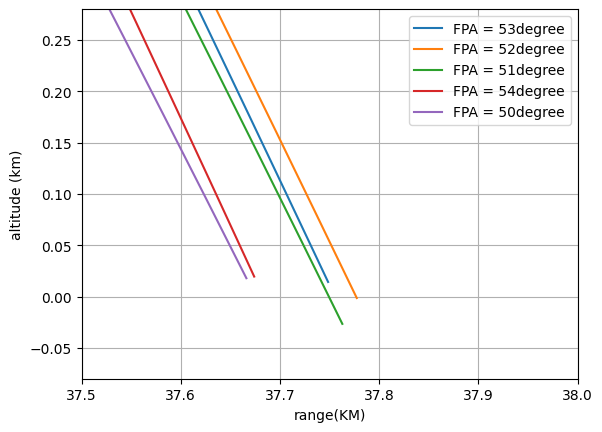

In [118]:


def model(z,t,d):
  S = np.pi * d * d / 4
  v,gamma,R ,h= z
  rho = 1.225*(1-2.256e-5*h)**5.256
  v_dot = (-0.5 * rho* v*v * S * Cd - m*9.8*np.sin(gamma))/m
  gamma_dot = -9.8 * np.cos(gamma) / v
  R_dot = v*np.cos(gamma)
  h_dot = v*np.sin(gamma)
  return np.array([v_dot, gamma_dot,R_dot,h_dot])
gammas =[i for i in range(90)]
t = np.linspace(0,140, 700)
answers = []
d = 0.16
max_ranges = {}
states = []
for gamma in gammas:
  z = [1000,np.deg2rad(gamma), 0,0]
  state = spi.odeint(model,z,t,args = (d,))
  states.append(state)
  #plt.plot(state[state[:,3]>0][:,2]/1000,state[state[:,3]>0][:,3]/1000,label = f"FPA = {gamma}deg")
  try:
    max_ranges[gamma] = np.max(state[state[:,3]>0][:,2])
  except:
    continue

max_ranges = sorted(max_ranges.items(), key=lambda x: x[1],reverse = True)


for i in max_ranges[0:5]:
  states_max =  states[i[0]]
  states_max = states_max[states_max[:,3]>=-50]
  plt.plot(states_max[:,2]/1000,states_max[:,3]/1000,label = f"FPA = {i[0]}degree")

plt.xlabel("range(KM)")
plt.ylabel("altitude (km)")
plt.xlim([37.5,38])
plt.ylim([-0.08,0.28])
plt.grid()
plt.legend()
plt.show()

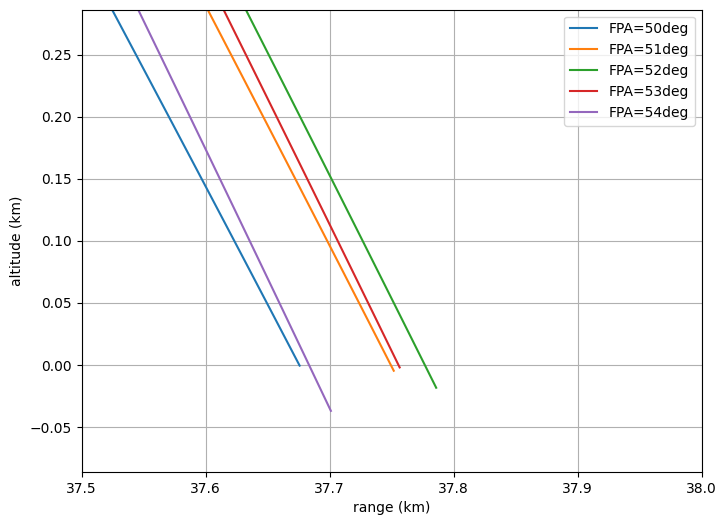

In [ ]:
# your code here



<br>


---

<br>


**(Problem 3)** Suppose you use the projectile for a parcel delivery service for your customers. Then you will probably need to make at least two modifications to your system, since the initial and the final speed of the projectile are too much high. So you decided to use a small engine, that will slowly accelerate the projectile in the beginning, and a small parachute that decelerates the projectile when it reaches the target. Your parachute deploys when $h\le 1000m$ and $\gamma\le 0$

So your model now looks like,

\begin{align*}
  m\dot{V} &= -0.5\rho V^2 S C_d - mg\sin\gamma + T \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

with

$$
T =
\begin{cases}
4000N & \text{if } t \le 5  s\\
0   & \text{otherwise}
\end{cases}
$$
and
$$
C_{d}=
\begin{cases}
10    & \text{if }  \gamma\le 0 \text{ and } h\le 1000m \\
0.2   & \text{otherwise}
\end{cases}
$$

Find a sample trajectory when

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $V(0)$: initial velocity (=$10$)
- $\gamma(0)$: launch angle (=$50\text{deg}$)



0.16


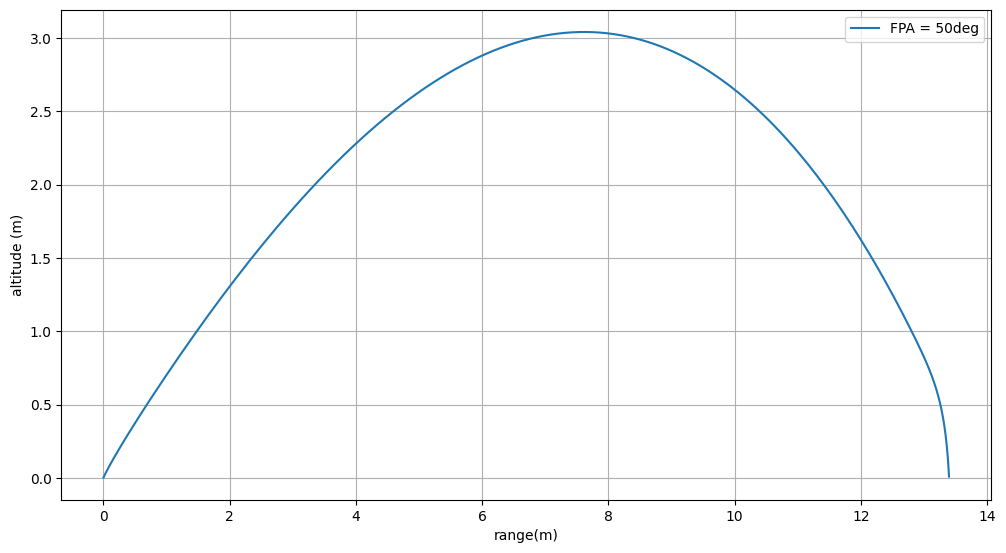

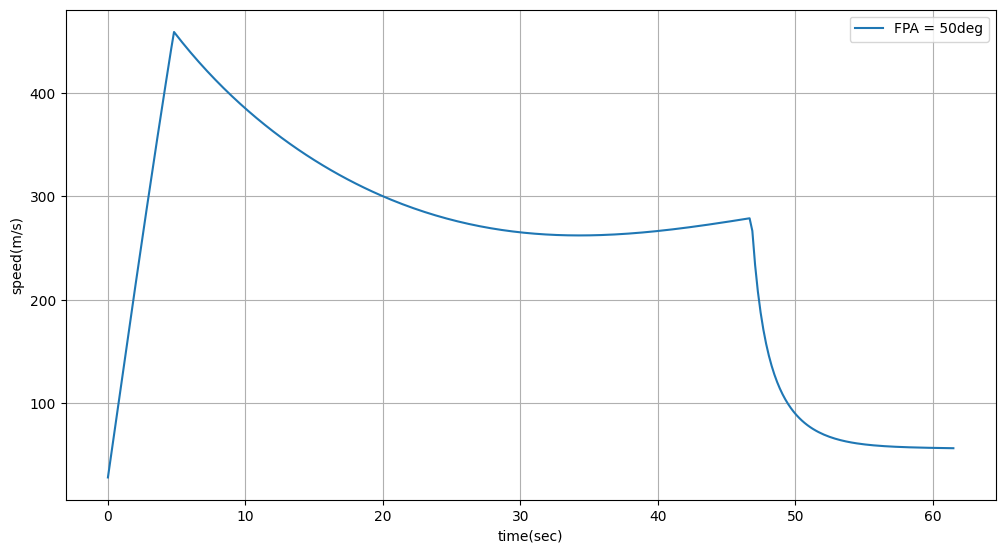

In [99]:
def model(z,t,d):
  S = np.pi * d * d / 4
  v,gamma,R ,h= z
  rho = 1.225*(1-2.256e-5*h)**5.256
  if t <= 5:
    T = 4000
  else:
    T = 0
  if gamma <= 0  and h <=1000:
    Cd = 10
  else:
    Cd = 0.2
  v_dot = (-0.5 * rho* v*v * S * Cd - m*9.8*np.sin(gamma))/m + T/m
  gamma_dot = -9.8 * np.cos(gamma) / v
  R_dot = v*np.cos(gamma)
  h_dot = v*np.sin(gamma)
  return np.array([v_dot, gamma_dot,R_dot,h_dot])
z = [10,np.deg2rad(50), 0,0]
print(d)
state = spi.odeint(model,z,t,args = (d,))
plt.figure(figsize=  (12,14))
plt.subplot(212)
plt.plot(state[state[:,3]>0][:,2]/1000,state[state[:,3]>0][:,3]/1000,label = f"FPA = {50}deg")
plt.xlabel("range(m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.legend()
plt.show()




plt.figure(figsize=  (12,14))
plt.subplot(211)
plt.plot(t[0:len(state[state[:,3]>0][:,0])],state[state[:,3]>0][:,0],label = f"FPA = {50}deg")
plt.grid
plt.xlabel("time(sec)")
plt.ylabel("speed(m/s)")
plt.grid()
plt.legend()
plt.show()


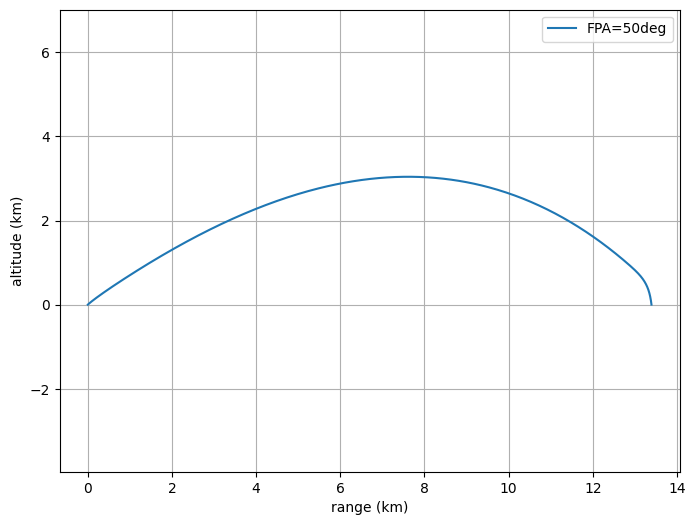

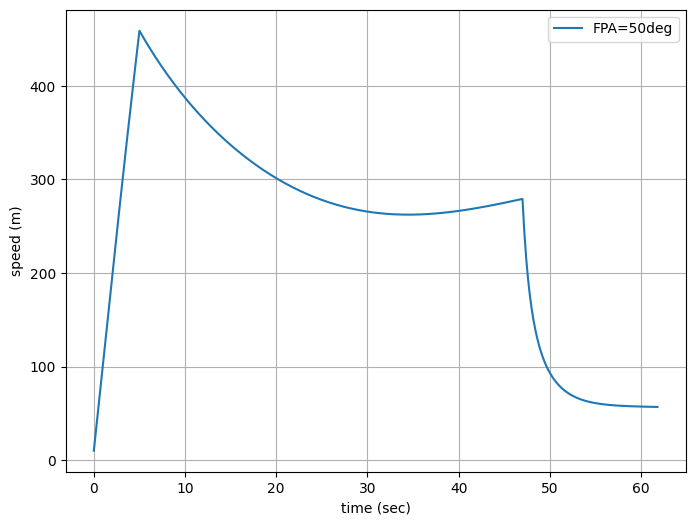

In [ ]:
# your code here



<br>


---

<br>


**(Problem 4)** What is the appropriate launch angle, $\gamma(0)$, for delivery to a customer located at 12km far? How long would the delivery to this customer take? How high would your rocket reach during the flight?

Initial launch angle: 44.147914791479145(deg)
Landing at: 12.000047325204358
Delivery time:54.077253218884124


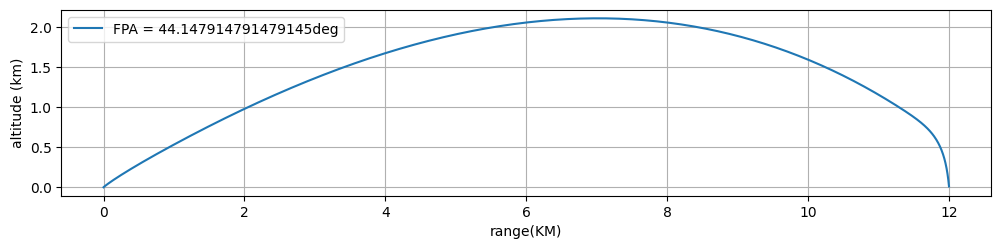

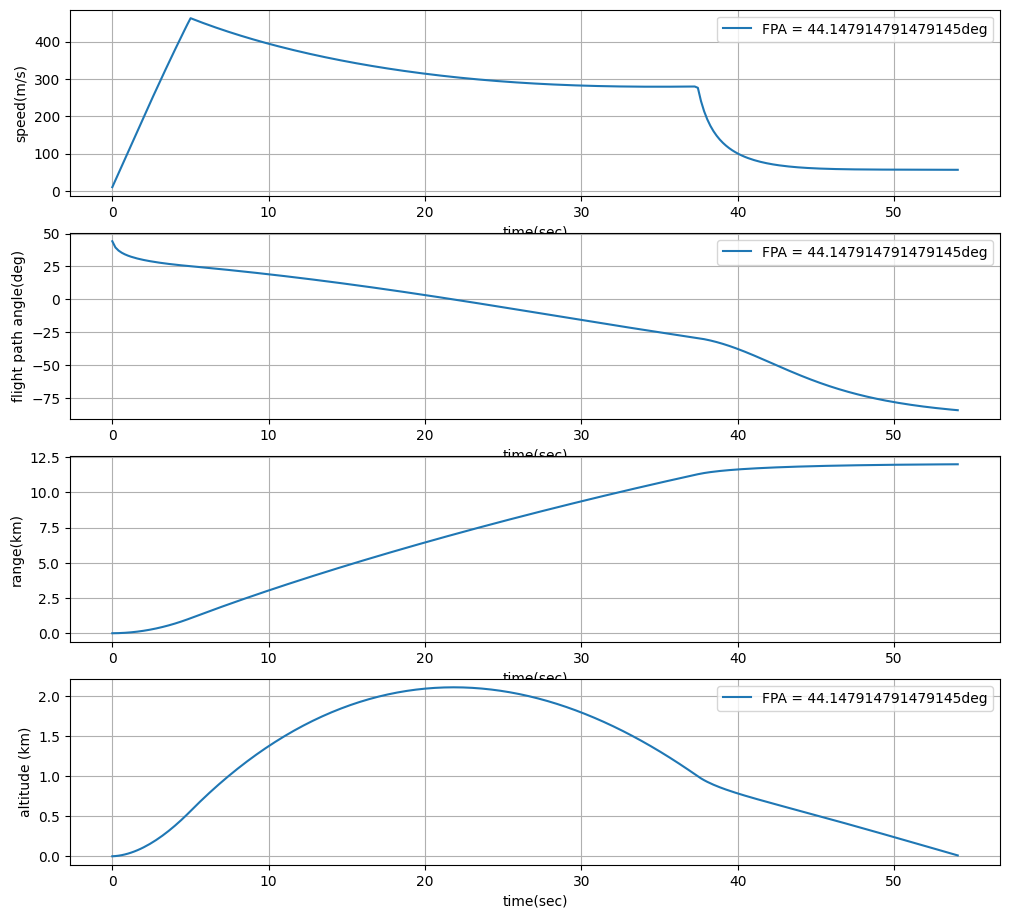

In [102]:
gammas =np.linspace(40,55,10000)
t = np.linspace(0,140, 700)
answers = []
d = 0.16
plt.figure(figsize=  (12,14))
plt.subplot(511)
#gammas = [44.1]
for gamma in gammas:
  z = [10,np.deg2rad(gamma), 0,0]
  state = spi.odeint(model,z,t,args = (d,))
  #if gamma >= 44.1:
  if np.abs(max(state[state[:,3]>0][:,2])-12000) <=0.1:
    print(f"Initial launch angle: {gamma}(deg)")
    print(f"Landing at: {np.max(state[state[:,3]>=0][:,2]/1000)}")
    print(f"Delivery time:{max(t[0:len(state[state[:,3]>=0][:,0])])}")

    plt.plot(state[state[:,3]>=0][:,2]/1000,state[state[:,3]>=0][:,3]/1000,label = f"FPA = {gamma}deg")
    break

plt.grid
plt.xlabel("range(KM)")
plt.ylabel("altitude (km)")
plt.grid()
plt.legend()



plt.figure(figsize=  (12,14))
plt.subplot(512)

plt.xlabel("time(sec)")
plt.ylabel("speed(m/s)")


plt.plot(t[0:len(state[state[:,3]>=0][:,0])],state[state[:,3]>=0][:,0],label = f"FPA = {gamma}deg")
plt.grid()
plt.legend()




plt.subplot(513)

plt.xlabel("time(sec)")
plt.ylabel("flight path angle(deg)")


plt.plot(t[0:len(state[state[:,3]>=0][:,0])],np.rad2deg(state[state[:,3]>=0][:,1]),label = f"FPA = {gamma}deg")
plt.grid()
plt.legend()







plt.subplot(514)


plt.xlabel("time(sec)")
plt.ylabel("range(km)")

plt.plot(t[0:len(state[state[:,3]>=0][:,0])],state[state[:,3]>=0][:,2]/1000,label = f"FPA = {gamma}deg")
plt.grid()



plt.subplot(515)
plt.plot(t[0:len(state[state[:,3]>=0][:,0])],state[state[:,3]>=0][:,3]/1000,label = f"FPA = {gamma}deg")



plt.grid
plt.xlabel("time(sec)")
plt.ylabel("altitude (km)")
plt.grid()
plt.legend()
plt.show()


Initial launch angle: 44.1(deg)
Landing at: 11.98608871680277(km)
Delivery time: 54.2(sec)
Maximum altitude: 2.101809671615191(km)


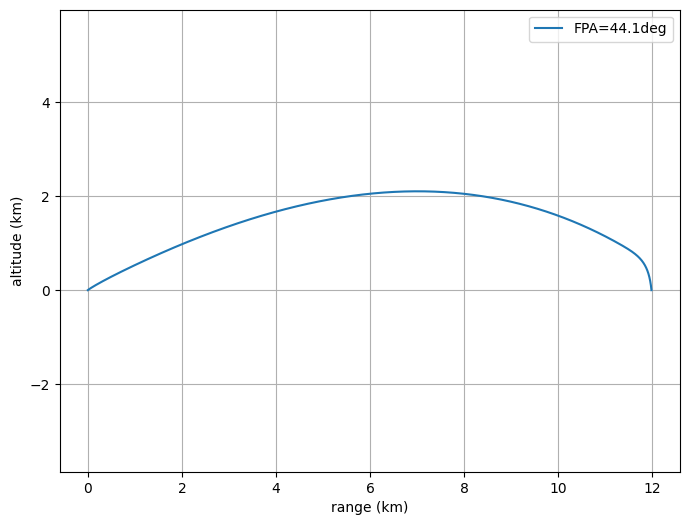

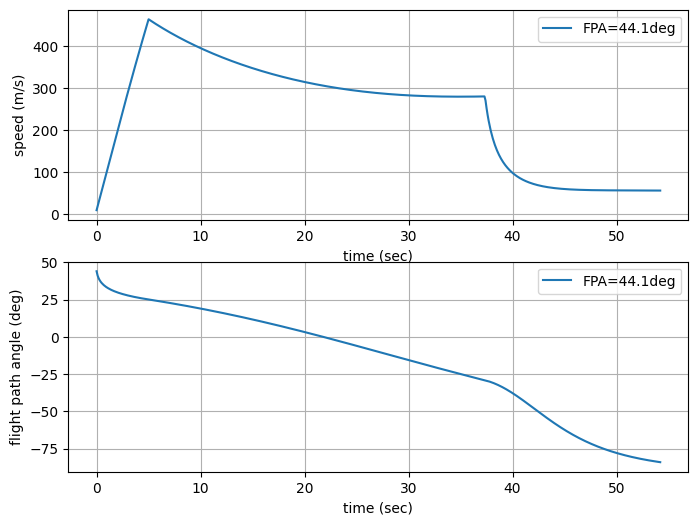

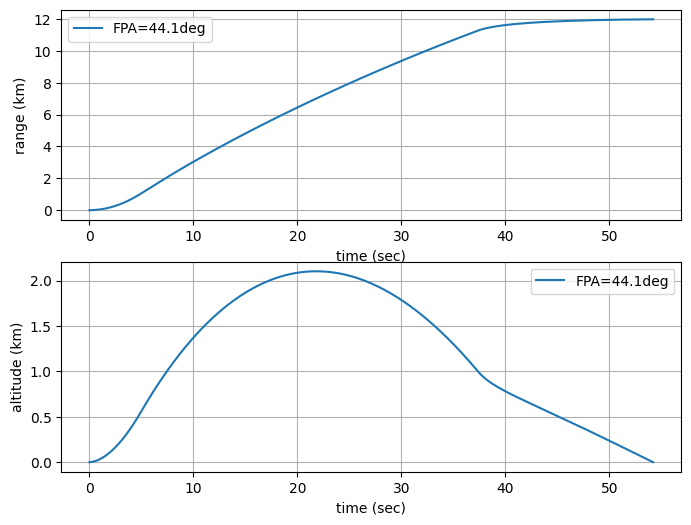

In [ ]:
# your code here

